# Handling files
![c](http://sd.keepcalm-o-matic.co.uk/i-w600/keep-calm-and-save-the-data-file.jpg)

If we want to handle a large amount of data, we have to use the files stored on the external storages (HDD, other devices) of the computer and not only the memory. In the following notebook, we are going to familiarize ourselves with the file handling functions of Pyhton, then we get to know the routines of `numpy`, and then we are going to introduce some formats used in scientific research (hdf5, fits). We begin our notebook with the usual line:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---

## Python's built-in file handling functions

In this chapter we are going to have a look at Python's function for file operations that are independent of the modules. These functions handle the content of files mostly as character strings, therefore, using, reading and writing formatted data might be painful. Usually, it is done through format-specific functions. For the examples, we are going to use a file that contains [historic observations of sunspots](http://www.sidc.be/silso/datafiles).

### Reading files

Reading a whole file into one character string happens according to the following method.

First of all, we open the file with the `open()` function. The `open()` function prepares the system for reading the file from the external storage. In its easiest form, we just give the name of the datafile to this function.

In [2]:
file1 = open('data/SN_m_tot_V2.0.txt')

In [3]:
file1

<_io.TextIOWrapper name='data/SN_m_tot_V2.0.txt' mode='r' encoding='UTF-8'>

The above line enables us to reach the content of the file through the `file1` variable. The complete content of the file might be read into a character string variable called `wholefile`.

In [4]:
wholefile=file1.read()

Attention, we should not mix the `file1` and `wholefile` variables. As we have alread mentioned, the `wholefile` variable is a character string, and `file1` enables the reading and/or writing of the file, that we also call "stream".

If we are finished with the reading/writing, we can close our stream with the `close()` command, that interrupts the communication with the external storage.

In [5]:
print(file1.closed)
file1.close()
print(file1.closed)

False
True


Above, we have already loaded the content of the data file into the string `wholefile`, for example, let's have a look at the first 100 characters of the file:

In [6]:
wholefile[:100]

'#1. oszlop ev  ho  T[ev]  napfolt_szam\n#2. oszlop honap\n#3. oszlop az ido evben merve \n#4. oszlop Na'

If we have a look at the file itself, we can see that indeed, this is the text at its beginning. Observe the `\n` character instead of the new line!

`read()` can read only a specific number of characters. Let us open the previous file again.

In [7]:
file1 = open('data/SN_m_tot_V2.0.txt')

Let us read 10 characters in the following way:

In [8]:
chars=file1.read(10)

The variable `chars1` contains the first 10 characters of the file.

In [11]:
chars

'#1. oszlop'

If we call again the `read()` function of the `file1` variable , then it is going to read the next 10 characters:

In [12]:
chars1=file1.read(10)

In [13]:
chars2

NameError: name 'chars2' is not defined

Thus, read makes us go through the characters of the file: if we once read something, we cannot read that same part again. Fortunately, this is not the case, since `tell()` and `seek()` can ask and/or set the position of an open filestream.

The `tell()` function gives us the actual stream position in the `file1` variable, which is now 20, because we used the `.read(10)` method two times.

In [ ]:
file1.tell()

The `seek()` method can jump to an arbitrary place in the file. `seek(n)` jumps to the `n`th character of the file. If we apply the read function after this, it is going to read the file from this position.

In [ ]:
file1.seek(5)

The next command reads 10 characters beginning from the 5th.

In [14]:
chars3=file1.read(10)

In [15]:
chars3

'[ev]  napf'

Let us close the file again!

In [16]:
file1.close()

In order to never forget closing a file, that might cause a hassle, Python has a very convenient construction, the `with`. This calls the given objects `__enter__()` and `__exit()__` functions automatically. Variables stay there after the `with` block, but files close automatically after it.

Advantages of `with`:
- we don't forget closing the file
- if there is an I/O error, the file closes
- we spared a line of code
- we won't mix different files, into which we want to write
- we can only write the file inside the block
    - a file is only open for a short amount of time, we won't mess up by writing it multiple times simultaneously
    - the code is easier to read
---

In [17]:
with open('data/SN_m_tot_V2.0.txt') as f:
    print(f.closed) # here the file is open
print(f.closed) # here the file is closed

False
True


In many cases, the information in our datafile is organized as a table. Each row of the file has the same marks for grouping our data. We can get all lines of an open file with the `readlines()` function.

In [18]:
with open('data/SN_m_tot_V2.0.txt') as f:
    lines = f.readlines()

The elements of the list `lines` are lines of the file, for example here are the first ten lines:

In [19]:
lines[0:10]

['#1. oszlop ev  ho  T[ev]  napfolt_szam\n',
 '#2. oszlop honap\n',
 '#3. oszlop az ido evben merve \n',
 '#4. oszlop Napfoltok szamanak atlaga\n',
 '#5. oszlop Napfoltok szamanak szorasa, negativ ertekek azt jelentik hogy az informacio nem all rendelkezesre!\n',
 '#6. oszlop Napfolt meresek szama,      negativ ertekek azt jelentik hogy az informacio nem all rendelkezesre!\n',
 '1749 01 1749.042   96.7  -1.0    -1  \n',
 '1749 02 1749.123  104.3  -1.0    -1  \n',
 '1749 03 1749.204  116.7  -1.0    -1  \n',
 '1749 04 1749.288   92.8  -1.0    -1  \n']

As we see, the first six lines begin with `#`, and each of these lines contain the description of the columns. After the 7th line, tough, there are numbers separated by spaces, which is the data itself, but unfortunately, still in the form of a string.

The first valuable line is the 7th:

In [20]:
lines[6]

'1749 01 1749.042   96.7  -1.0    -1  \n'

A character string may be split with the `.split()` method along given characters into a list. The `.split()` method defaults to splitting on spaces, therefore, the first valuable line might be split by:

In [21]:
lines[6].split()

['1749', '01', '1749.042', '96.7', '-1.0', '-1']

The result is thus a list that contains the valuable data, but they are still small strings! We have to convert these strings into float numbers using the `float()` function. Here is the conversion of the fourth column of the first data line:

In [25]:
float(lines[6].split()[3])

96.7

If we can convert one element to a number, then using a `for` cycle, we can arrange our data into lists using the known way:

In [26]:
num_sunspot=[]
measurement_time=[]
for sor in sorok[6:]:
    num_sunspot.append( float(sor.split()[3]) )
    measurement_time.append(  float(sor.split()[2]) )

NameError: name 'sorok' is not defined

Let us plot the number of sunspots as a function of time:

In [ ]:
plot(measurement_time,num_sunspot)
xlabel('T [year]')
ylabel('Number of sunspots')

We can see that the number of sunspots oscillates periodically in the last 250 years.

If we read very big files, it is not worth to, and it is also not possible to read the whole file into the memory. Python has a solution to this problem as well, we can iterate through the open file in a for cycle:

Text(0, 0.5, 'Number of sunspots')

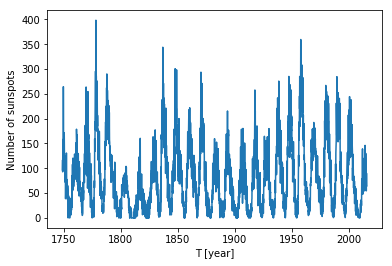

In [27]:
with open('data/SN_m_tot_V2.0.txt') as f:
    num_sunspot,measurement_time=[],[]
    for sor in f: # iterating through a data stream or file
        if sor[0]!='#':
            num_sunspot.append( float(sor.split()[3]) )
            measurement_time.append(  float(sor.split()[2]) )
        
plot(measurement_time,num_sunspot) # this plot is the same as the previous one
xlabel('T [year]')
ylabel('Number of sunspots')

### Saving

Next to reading the data, we might need to write out the processed information. Python has the `write()` function for this task for data streams. Let us observe writing on a simple example!

We open a file, in which we would like to write, we can signal this through the `mode` parameter of the `open()` function by setting `mode='w'`. Here, `'w'` means writing.

We can write character strings now to the `file2` stream using the `write()` function.

In [28]:
with open('data/out_mentes1.dat',mode='w') as f:
    print(f)

<_io.TextIOWrapper name='data/out_mentes1.dat' mode='w' encoding='UTF-8'>


In [29]:
with open('data/out_mentes1.dat',mode='w') as f:
    print(f.write('#Ez az elso kiirt fileom!\n'))

26


If we would like to append characters to an existing file, then we can set the `mode` parameter of the `open()` function to `mode='a'`. Here, `'a'` meand append, as for example in the case of lists.

In [30]:
with open('data/out_mentes1.dat',mode='a') as f:
     print(f)

<_io.TextIOWrapper name='data/out_mentes1.dat' mode='a' encoding='UTF-8'>


Let us write the measurement time and number of sunspots data into the already existing `data/out_save1.dat` file! We are going to do this using a for cycle.

In [31]:
with open('data/out_mentes1.dat',mode='a') as f:
    for i in range(len(measurement_time)):
        f.write(str(measurement_time[i])+' '+str(num_sunspot[i])+'\n')

The character string in the argument of the `write()` function contains the elements we wanted with a space in between, and a linebreak given by `'\n'`.

Similarly to reading, we can write out whole lines when writing. Not surprisingly, the function is called `writelines()`. This function writes lists of character strings into a file through an open filestream.

If every element in the list ends by `'\n'`, then after writing, each list element is going to be a single line in the file.

In [32]:
sorok=['This is the first line\n','This is the second line\n']
with open('data/out_mentes1.dat',mode='a') as f:
    f.writelines(sorok)

What if there is no `'\n'` ? 

In [33]:
sorok=['This is the third line','Where is it?\n']
with open('data/out_mentes2.dat',mode='a') as f:
    f.writelines(sorok)

Let us observe the file itself!

If we want to write lines, and we don't want to add `'\n'` each time, we can use the `print()` function.

In [34]:
sorok=['This is the third line','Where is it?\n']
with open('data/out_mentes3.dat',mode='w') as f:
    for s in sorok:
        print(s,file=f)

### Strange characters in strings

We have already met with the newline character `'\n'`. Similary to this, there are some more so-called [literal](https://docs.python.org/2.0/ref/strings.html) characters, that have a special meaning. Here's a table from the most common ones:


character |	meaning
-|-
\n|	newline
\r|	carriage return
\t|	horizontal space (TAB)
\v| vertical space (TAB)
\xhh..| hexadecimal character with hh value



The effect of `'\r'`, `'\t'`, and `'\n'` using the `print()` function:

In [35]:
print("THESE ARE CAPITALSthese are lowercase")

THESE ARE CAPITALSthese are lowercase


In [36]:
print("THESE ARE CAPITALS\rthese are lowercase")

these are lowercase


In [37]:
print("THESE ARE CAPITALS\tthese are lowercase")

THESE ARE CAPITALS	these are lowercase


In [38]:
print("THESE ARE CAPITALS\nthese are lowercase")

THESE ARE CAPITALS
these are lowercase


These characters behave the same way when writing to a file.

## Numpy file handling routines

As we have already seen, the `array` class of the `numpy` package has many advantages compared to a simple `list` variable. The `numpy` package provides some very useful file handling routines, that can be used to read `array` class variables from a file or write them to a file. Below, we are going to have a look at two interesting examples.

![Baumgartner Jump with data](http://img.youtube.com/vi/raiFrxbHxV0/0.jpg)

First, we are going to analyze the data from the [jump](https://youtu.be/raiFrxbHxV0) of Felix Baumgartner. The distance vs time data can be found in the `data/h_vs_t` file. Have a look at the file itself! It contains two columns of numbers. The first column is the time in seconds, the second is the height at that given timepoint in meters. Such simple filestructures are easy to read and load into `array`s with the `loadtxt` function of `numpy`.

In [39]:
baum_data=loadtxt('data/h_vs_t.txt')

We store the first column of the `baum_data` array in the variable `t`, and the second column in the variable `h`.

In [40]:
t=baum_data[:,0] # time
h=baum_data[:,1] # height

Let us plot the data! We pay attention to not leaving the labels from the axes.

Text(0, 0.5, 'Height [m]')

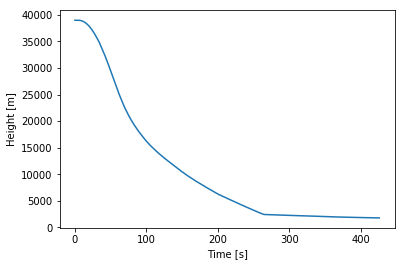

In [41]:
plot(t,h)
xlabel('Time [s]')
ylabel('Height [m]')

It was an important question concerning the jump whether sound velocity will be achieved. Let's investigate from the data, whether it happened. First of all, we need the time dependence of velocity. We can achieve this through numberically derivating the height-time function. If we samply an $y(x)$ function with a finite number of $x_i,y_i$ pairs, then the numerical derivative is roughly the following difference:

 $$\left . \frac{\mathrm{d}y}{\mathrm{d}x}\right|_{x_i} =\frac{y_{i+1}-y_i}{x_{i+1}-x_i} $$

Let us now define a function, that creates the numerical derivative from two arrays `x` and `y`.We have to take care of the first and the last elements of the arrays differently.

In [42]:
# numerical derivative function
def nderiv(y,x):
    "Frist neighbor differetial"
    n = len(y) # number of datapoints
    d = zeros(n) # initializing an array with zeros
    # handling endpoints
    for i in range(1,n-1):
        d[i] = (y[i+1]-y[i])/(x[i+1]-x[i])   # derivative of a general point
    d[0] = (y[1]-y[0])/(x[1]-x[0])           # derivative of the first point
    d[n-1] = (y[n-1]-y[n-2])/(x[n-1]-x[n-2]) # derivative of the last point
    return d

We can now determine the velocity with the help of the `nderiv` function.

In [43]:
v=nderiv(h,t) # The first variable is 'h' and the second is 't'!!!

How does the velocity-time function look like?

Text(0, 0.5, 'Velocity [m/s]')

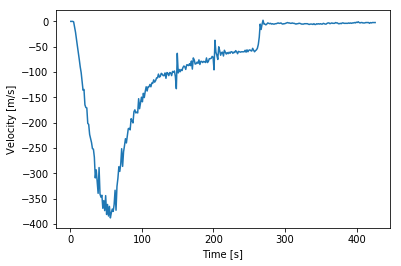

In [44]:
plot(t,v)
xlabel('Time [s]')
ylabel('Velocity [m/s]')

Because the speed of sound depends on height, it is reasonable to plot the velocity as a function of height in order to determine whether Felix Baumgartner has crossed the threshold.

Text(0, 0.5, 'Velocity [m/s]')

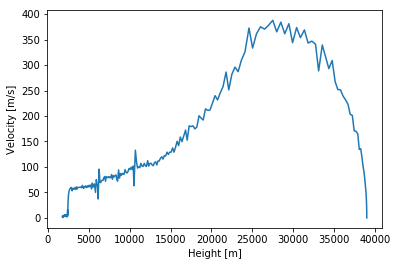

In [45]:
plot(h,abs(v))
xlabel('Height [m]')
ylabel('Velocity [m/s]')

According to [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Comparison_US_standard_atmosphere_1962.svg/2000px-Comparison_US_standard_atmosphere_1962.svg.png), around 25 km of height, the velocity of sound is slightly below 300 m/s. At this height, the velocity of Felix Baumgartner has been around 350 m/s, therefore he has succeeded in setting the record according to the measurements.

We can save the velocity-time data with the `savetxt` function of `numpy`.

In [46]:
savetxt('data/out_tv.txt',[t,v])

Observe the file!

## Numpy binary I/O

Writing big arrays into textfiles might be very slow. If no human is ever going to read our files, only computers, we can choose to use the binary load/save functions of `numpy`, that enables very fast reading/writing.

Let us now make a big array.

In [47]:
# big array
a=random.random((2048,2048))

Let us write it out as a text, and let's measure how long it takes.

In [48]:
%time savetxt('data/out_tmp.txt',a)

CPU times: user 2.29 s, sys: 47.4 ms, total: 2.33 s
Wall time: 2.33 s


Let's save it in binary mode. This is simply done by using the [`save`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html) function of the `numpy` module. This function enables binary mode writing for variables.

In [49]:
%time save('data/out_tmp.npy',a)

CPU times: user 778 µs, sys: 20.2 ms, total: 20.9 ms
Wall time: 20.3 ms


Let's read it as text.

In [50]:
%time a1=loadtxt('data/out_tmp.txt')

CPU times: user 2.34 s, sys: 52 ms, total: 2.39 s
Wall time: 2.37 s


Let's read it as a binary.

In [51]:
%time a2=load('data/out_tmp.npy')

CPU times: user 0 ns, sys: 12 ms, total: 12 ms
Wall time: 11.1 ms


Let's compare the two arrays.

In [52]:
all(a1==a2)

True

Let's compare the file sizes!

In [53]:
! du -h data/out_tmp.txt

100M	data/out_tmp.txt


In [54]:
! du -h data/out_tmp.npy

33M	data/out_tmp.npy


There can even be one order of magnitude difference in the writing when we use the binary mode. The size of binary files is also smaller.

---

## Pickle,  let's save anything

It might happen that we want to save a simple table or anything else that can eb easily represented in a file. In such cases, we don't have to create difficult read/write functions, because we can use the `pickle` package of Python. This can convert any python objects to bytes, and save it to a file.

Assume that we would like to save a complex number that we've already worked on, and we'd like to use it later.

In [55]:
class Complex:
    """
    Our own complex class instead of that of Python.
    We could still work on it...
    
    """
    def __init__(self,re,im):
        self.re,self.im=re,im
    
    def __add__(self,other):
        return Complex(self.re+other.re,self.im+other.im)
    
    def __mul__(self,other):
        re=self.re*other.re - self.im*other.im
        im=self.re*other.im + self.im*other.re
        return Complex(re,im)
    
    def __abs__(self):
        return (self.re**2 + self.im**2)**0.5
    
    def __str__(self):
         return str(self.re)+' + '+str(self.im)+'i'
    __repr__=__str__

In [56]:
z=Complex(3,4)
'test:',z,abs(z),z+z,z*z

('test:', 3 + 4i, 5.0, 6 + 8i, -7 + 24i)

In [57]:
import pickle # loading the picke module as usual

We open a file and we can write into it. We use the function [`dump`](https://docs.python.org/3/library/pickle.html?highlight=dump#pickle.dump) from the `pickle` module.

In [58]:
with open("data/out_complex.pkl","wb") as f:
    pickle.dump(z,f)

Let's load it back. This is done by `pickle` module's [`load`](https://docs.python.org/3/library/pickle.html?highlight=dump#pickle.load) function:

In [59]:
with open("data/out_complex.pkl","rb") as f:
    uj_z = pickle.load(f)

In [60]:
uj_z

3 + 4i

---

## Images

It is very easy to manipulate images in Python. Now, we only have a look at the most common `matplotlib` functions, but there are many other packages for handling image files, e.g. [opencv](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html),[scikit-image](http://scikit-image.org/),[pillow](https://python-pillow.org/).

Loading an image is easiest with the function `matplotlib.image.imread`.

In [61]:
im=imread('data/Photo_51_x-ray_diffraction_image.jpg')

The loaded image has `numpy.array` type, that we already know.

In [62]:
type(im)

numpy.ndarray

It is possible to have a look at the image with other colorscales or at another scale.

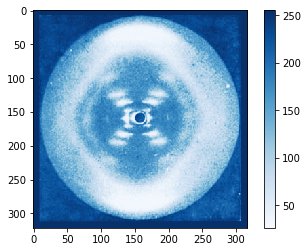

In [63]:
imshow(im[:,:,2],cmap='Blues') # the blue channel with a colormap 'Blues'
colorbar() # colorscale

When manipulating images, we have to pay attention to the fact that they are mostly composed of `uint8` type numbers. The values of this type are integer values represented on 8 bits, and therefore, they are in the [0-255] interval.

In [64]:
im.dtype

dtype('uint8')

After we determine the spatial structure of the DNA from the above picture, we can save the image. The extension of the filename automatically determines the format of the picture.

In [68]:
imsave('data/out_saved_image.jpg',im)  # saving to jpg
imsave('data/out_saved_image.png',im)  # saving to png
imsave('data/out_saved_image.tiff',im) # saving to tiff

# Some exotic file formats in Python

## HDF files

Hierarchical Data Format, or HDF is a widespread format for storing or sharing large amounts of scientific data. It has two main versions, that are not really compatible with each other. In this part, we are going to have a look at the newer HDF5 files.

The data stored in HDF5 files can be arranged into groups and subgroups, between which we can make references. We can imagine it as a directory structure that contains data everywhere.

![](http://neondataskills.org/images/HDf5/hdf5_structure4.jpg)

There are two main parts of an HDF5 file, containing the descriptive metadata, and the data itself. The data is stored in multidimensional tables. We can refer to the subgroups of an HDF5 file as in a traditional directory structure by giving names to the subgroups. There is a "root" group, that is denoted by "/", and then a certain data array can be refferred to as "/groupname/data".

In Python, the package `h5py` is the most common way of handling HDF5 files.

In [69]:
import h5py

We can open HDF5 files with the `h5py.File` funciton. First, we have to decide whether we would like to read or write the given file through the 'r' or 'w' options that are similar to that of the built-in `open()` function.

In [70]:
f = h5py.File("data/data.h5", "r")

The names of the elements of the data directory can be retrieved as dictionary keys with the `keys()` method.

In [71]:
list(f.keys()) # if we don't transform it into a list, it won't be printed nicely

['data', 'data_descr']

One step down the hierarchy, there are the following keys:

In [72]:
list(f["data"].keys()) 

['data', 'data_indices', 'data_indptr', 'label']

Let's have a look at the `data/data` group contanining the most information.

In [73]:
f["data/data"] # this contains a data table

<HDF5 dataset "data": shape (451592,), type "<f8">

In [74]:
f["/data/data"][:] # we get an array now

array([1., 1., 1., ..., 1., 1., 1.])

These files can store very complex data structures. The groups and subgroups can encode different relations. Of course, reading such files is more difficult than simple text files, and to be able to interpret a certain file, we have to have some information on its structure.

### Visualizations of HDF5 datafiles

Next, we are going to show how to visualize data from HDF5 files.

In [75]:
f = h5py.File("data/h5ex_t_enum.h5", "r")

By applying the `values()` method, we can see that in this file there is only one data group with a name DS1. Moreover, the system also shows that we have to read a 4x7 matrix.

In [76]:
list(f.values())

[<HDF5 dataset "DS1": shape (4, 7), type ">i2">]

As we have already seen, the `imshow` function of Python can represent an array as an image.

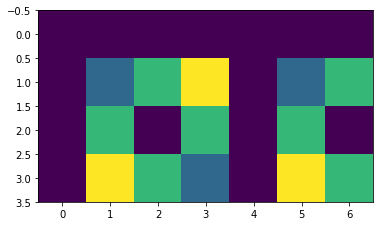

In [77]:
imshow(f["DS1"])

More information on HDF5 files:
- [official documentation](http://docs.h5py.org/en/latest/quick.html) of `h5py`
- [Homepage](https://www.hdfgroup.org/) of the HDF group
- HDF5 [tutorials](http://neondataskills.org/HDF5/)

## Flexible Image Transport System, or [Fits](https://fits.gsfc.nasa.gov/fits_primer.html) files

FITS is the most common image format of modern astronomy. Apart from storing visual information, these files keep metadata that is indispensable for further processing, such as exact time or setting of the device the image has been taken with.

FITS file have two main parts. First is the header that stores the metadata, and the second is the observed data series. Mostly, these data series are 2D arrays corrsesponding to images captures by the CCD sensors of telescopes, but it is possible to store more dimensions as well, with a maximum of 999.

Out of these two main parts, multiple segments can be built and concatenated into one FITS file. These segments are called HDUs (Header/Data Units). One FITS may contain multiple HDUs. For example, one file can store images taken with different filters.

<img src=http://www.stsci.edu/hst/cos/documents/handbooks/datahandbook/images/ch2_cos_data5.02.jpg></img>

Sometimes, the first HDU is called Primary, and the further HDUs are called Extend. This meand that by default, the first HDU is used.

Three types of data can be stored in FITS images:

* "IMAGE" multidimensional visual information
* "TABLE" ASCII table that is not human readable
* "BINTABLE" binary multidimensional data table

We can work with FITS files by loading the `astropy` package. The module is gigantic, and its `astropy.io` submodule handles the FITS images. The `astropy.wcs` submodule can convert between different coordinate systems that can also be used for the representation of the images.

In [78]:
#from astropy.io import fits
import astropy.io.fits as fits
#from astropy import wcs as wcs
import astropy.wcs as wcs

If we have a look at the example datafile `data/HorseHead.fits`, we can see that it cannot be loaded as a textfile with the `cat` command of `bash`, because it contains mostly unreadable binary data.

In [79]:
! cat data/HorseHead.fits | head -n 2 | tail -1

!�!�#�#�$�'"'"$g#P$!&P((%�$�%\'�'�&s'�&s$�%�(�+(\&-#�%$�$�%9$!$�$�"�$�'"&
cat: write error: Broken pipe


We can load the file with the `fits.open` command of the `astropy` package.

In [80]:
hdu=fits.open('data/HorseHead.fits')

The loaded data has several different properties. One of them is that we can have a look at the HDUs that are contained in it. In this case, out picture has two segments.

In [81]:
hdu.info()

Filename: data/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


After choosing a segment, it is possible to have a look at the content of the header with the `header` option. We can see that there is much information encoded into the header.

In [82]:
len(hdu[0].header)

161

In [83]:
hdu[0].header[:10] # Ez csak az első 10 sor a header-ből

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               

The visual information is stored in the  `data` option of the segment. This has the type of the already familiar `numpy.array`.

In [84]:
image=hdu[0].data
image.shape

(893, 891)

In [85]:
image

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

The advantage of the fits files used in anstronomy is that along the information encoded in the picture, the header contains important metadata such as the properties of the method the picture was made with. There is also information on the celestial coordinates of the picture. The coordinate information can be listed with the `wcs.WCS` command.

In [86]:
kord=wcs.WCS(hdu[0].header)
kord

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.59941666666666  -4.946638888888889  
CRPIX : -716.333144294269  -8444.64946698226  
PC1_1 PC1_2  : 0.015029018460682027  -9.63735777657198e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893

Knowing the coordinates enables us to make a figure whose axes are the celestial coordinate axes, therefore, we are able to read the celestial position of the given part of the picture.
First, we make the box in which we are going to put our picture analogous to the drawing of 3D plots:

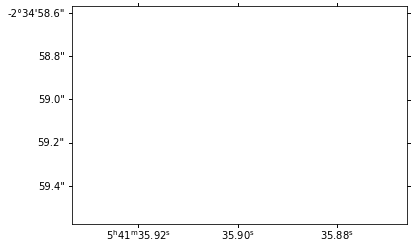

In [87]:
subplot(111,projection=kord) # telling matplotlib to use celestial coordinates

Let's load the box with the information from the image.

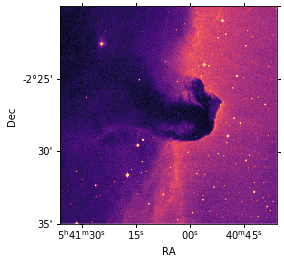

In [88]:
subplot(111,projection=kord) 
plt.imshow(image, cmap="magma", origin='lower')
plt.xlabel('RA')
plt.ylabel('Dec')